# Modelling

In this notebook I'll be starting the modelling phase of my project.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

In [2]:
X_train_s = pd.read_pickle('data1/X_train_s.pkl')
X_val_s = pd.read_pickle('data1/X_val_s.pkl')
X_test_s = pd.read_pickle('data1/X_test_s.pkl')
y_train = pd.read_pickle('data1/y_train.pkl')
y_val = pd.read_pickle('data1/y_val.pkl')
y_test = pd.read_pickle('data1/y_test.pkl')
df=pd.read_pickle("data1/df.pkl")


Data has been loaded.

## Linear Regression

For my first model, I'll be running a Linear Regression to get a baseline understanding of how well my features can predict the target variable, `Market Value`.

### Linearity

Since we are doing Linear Regression we should check for linearity between our variables.

In [3]:
#concat the train data
train_data = pd.concat([X_train_s, y_train], axis=1)

#set up the corr matrix
correlation_matrix = train_data.corr()

In [31]:
#get corr matrix
correlation_values = correlation_matrix["market_value"]

#sort the correlation values in descending order and get the top 10 for positive and negative correlation
sortedposcorr = correlation_values.sort_values(ascending=False).head(10)
sortednegcorr= correlation_values.sort_values(ascending=True).head(10)

print(sortedposcorr)


market_value                     1.000000
Country_Russia                   0.011604
sub_position_Central Midfield    0.007945
Country_Morocco                  0.007656
league_id_ES1                    0.007512
height_in_cm                     0.006708
Country_Cote d'Ivoire            0.006066
sub_position_Second Striker      0.004974
Country_Scotland                 0.004743
last_season_x                    0.004453
Name: market_value, dtype: float64


In [32]:
print(sortednegcorr)

sub_position_Right Midfield       -0.008534
Country_Turkey                    -0.008409
Country_England                   -0.008379
league_id_TR1                     -0.007212
sub_position_Left-Back            -0.006865
Country_Brazil                    -0.006024
month                             -0.005411
Country_Greece                    -0.005313
yellow_cards                      -0.005298
sub_position_Attacking Midfield   -0.004437
Name: market_value, dtype: float64


 We dont seem to have any strong postive or negative correlations. This could be down to the scaling as in the EDA step there was a decent amount of correlation in the dataset, but we can likely say that a linear regression is not the best machine learning algorithm for this dataset. We will do it anyway as a baseline model however.

### Base Model

The first step in Modelling for my project will be making the baseline linear regression model.

In [6]:
#import LinearRegression
from sklearn.linear_model import LinearRegression

#instantiate
LinReg=LinearRegression()

#fit
LinReg.fit(X_train_s,y_train)

#Score
#Train
print(f"train R^2 score:{LinReg.score(X_train_s,y_train)}")

#Val
print(f"validation R^2 score:{LinReg.score(X_val_s,y_val)}")


train R^2 score:0.693051423049036
validation R^2 score:0.6898009108330572


The training R^2 score of 0.6933 indicates our Linear Regression model captures about 70% of training variance. The validation R^2 score of 0.69 also indicates about 70% variance.This is decent as higher R-squared values, closer to 1, signify a better fit hence showcasing the model's moderate ability to recognise and capture patterns in the validation set.

### Coefficients & Intercepts

In [7]:
LinReg.intercept_

5096796.852634913

My Linear Regression Model has a y-intercept of approximately €5.1 million indicating that when all my other features are set to zero (have no effect) the baseline value of the player is 5.1 million euros.

In [8]:
#get coefficients
coefficients = LinReg.coef_

# set up a dataframe
coefficientsdf = pd.DataFrame({'Feature': LinReg.feature_names_in_, 'coefficients': coefficients})

#sort in desc order
coefficientsdf = coefficientsdf.sort_values(by='coefficients', ascending=False)

#display the 10 highest coefficients
print(coefficientsdf.head(10))


                Feature  coefficients
63        Country_Other  2.515608e+19
70        Country_Spain  1.665870e+19
56       Country_France  1.448118e+19
72       Country_Turkey  1.355611e+19
61  Country_Netherlands  1.352889e+19
51       Country_Brazil  1.344074e+19
65     Country_Portugal  1.308863e+19
57      Country_Germany  1.301109e+19
59        Country_Italy  1.263444e+19
66       Country_Russia  1.212863e+19


In [9]:
#display the 10 lowest coefficients
print(coefficientsdf.tail(10))


                        Feature  coefficients
17                   foot_right -5.819010e+18
37                league_id_ES1 -5.909463e+18
29     sub_position_Left Winger -6.932207e+18
32    sub_position_Right Winger -6.984300e+18
30       sub_position_Left-Back -8.518018e+18
33      sub_position_Right-Back -8.947421e+18
25  sub_position_Centre-Forward -9.637604e+18
24     sub_position_Centre-Back -1.263725e+19
27      sub_position_Goalkeeper -1.856675e+19
21            position_Midfield -2.387822e+19


#### Analysis:

- **Positive Coefficients:** Features like 'Country_Other,' 'Country_Spain,' etc., have large positive coefficients, indicating a strong positive influence on the target variable.They seem to be majority in the country collumns suggesting that for this specific dataset, countries have the strongest positive influence in a players valuation.

- **Negative Coefficients:** Features like 'position_Goalkeeper,' 'position_Midfield,' etc., have large negative coefficients, suggesting a strong negative influence on the target variable. They seem to be mostly in the sub-position collumns suggesting that the specific subposition of a player is one of the leading factors for a lower transfer fee.


## Non-Linear Models

### Chosen Metrics

- **R-Squared Score**: I've chosen R-squared score as my main metric which is the proportion of variance that is explained by my model.
- **Mean Absolute Error**: I chose Mean Absolute Error as my secondary metric as a direct metric for me to judge my model off of. I opted for Mean Absolute Error over Root Mean Squared Error/ Mean Squared Error as it's less sensitive to outliers and as seen in my EDA (Notebook 2), I have quite a lot of outliers which skew my target variable.
- **Mean Absolute Percentage Error**: Mean Absolute Percentage Error gives me the Mean Absolute Error as a percentage off the actual values, giving me a more relative measure of my error, which is particularly useful for understanding the prediction accuracy in terms of the scale of the target variable. 

### Decision Tree Regressor

I will be setting up a basic, unoptimised Decision Tree Regressor to get a gauge of how it would look.

In [10]:
#import DT regressor
from sklearn.tree import DecisionTreeRegressor

#instantiate
dtbase=DecisionTreeRegressor()

#fit
dtbase.fit(X_train_s,y_train)

#Score
#Train
print(dtbase.score(X_train_s,y_train))

#Val
print(dtbase.score(X_val_s,y_val))

0.9999959853676804
0.8740324450987234


Here I get a train score of 99.999% accuracy which would be great if the validation score followed suit however the validation score is quite a bit lower suggesting quite a significant overfit even if these values are good.

### GridSearch & Cross-Validation

Since I have quite a significant amount of overfitting I need to tune my hyperparameters and run a gridsearch. I can do this by setting up a parameter grid and passing that into my decision tree regressor model with a 5-fold cross validation.I will be tuning 4 hyperparameters including `"max_depth"`,`"min_samples_split"`,`"min_samples_leaf"`,`"criterion"` with a range of values for each.

**Sidenote**-Modifying the max-depth parameter grid as it landed on the highest max depth that we fed into it, hence suggesting that a higher max depth might be more suited.

In [11]:
from sklearn.model_selection import GridSearchCV

##instantiate
dtcv = DecisionTreeRegressor()

# # Define the parameter grid
paramgrid = {
     "max_depth": [10,15,20,25],  #how deep the tree is allowed to go
     "min_samples_split": [2, 4, 6, 8],  #minimum number of samples required to split node
    "min_samples_leaf": [1, 2, 4, 6, 8],  #minimum number of samples required at leaf node
     "criterion": ["squared_error"],  # splitting criteria squared error
 }

 #import gridsearchcv, link it to our pipeline and fit to our train
gridsearch = GridSearchCV(dtcv, paramgrid,verbose=3, cv=5)
gridsearch.fit(X_train_s, y_train)


Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.838 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.841 total time=   1.7s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.846 total time=   1.6s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.840 total time=   1.5s
[CV 5/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=2;, score=0.845 total time=   1.6s
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.835 total time=   1.7s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=1, min_samples_split=4;, score=0.840 total time=   1.6s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples

[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=4;, score=0.850 total time=   1.6s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=4;, score=0.844 total time=   1.6s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=4;, score=0.838 total time=   1.7s
[CV 5/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=4;, score=0.846 total time=   1.6s
[CV 1/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=6;, score=0.842 total time=   1.5s
[CV 2/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=6;, score=0.850 total time=   1.7s
[CV 3/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=6;, score=0.844 total time=   1.7s
[CV 4/5] END criterion=squared_error, max_depth=10, min_samples_leaf=6, min_samples_split=6;, score=0.838 total time=   1.7s


[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=6;, score=0.859 total time=   3.5s
[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=6;, score=0.843 total time=   3.5s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=6;, score=0.864 total time=   3.3s
[CV 1/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=8;, score=0.846 total time=   3.1s
[CV 2/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=8;, score=0.866 total time=   3.3s
[CV 3/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=8;, score=0.858 total time=   3.6s
[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=8;, score=0.845 total time=   3.7s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=2, min_samples_split=8;, score=0.867 total time=   3.1s


[CV 4/5] END criterion=squared_error, max_depth=15, min_samples_leaf=8, min_samples_split=8;, score=0.847 total time=   2.9s
[CV 5/5] END criterion=squared_error, max_depth=15, min_samples_leaf=8, min_samples_split=8;, score=0.859 total time=   2.9s
[CV 1/5] END criterion=squared_error, max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.846 total time=   5.1s
[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.863 total time=   5.0s
[CV 3/5] END criterion=squared_error, max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.862 total time=   6.1s
[CV 4/5] END criterion=squared_error, max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.839 total time=   5.9s
[CV 5/5] END criterion=squared_error, max_depth=20, min_samples_leaf=1, min_samples_split=2;, score=0.861 total time=   5.6s
[CV 1/5] END criterion=squared_error, max_depth=20, min_samples_leaf=1, min_samples_split=4;, score=0.851 total time=   5.7s


[CV 5/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=2;, score=0.858 total time=   3.9s
[CV 1/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=4;, score=0.855 total time=   3.9s
[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=4;, score=0.857 total time=   4.0s
[CV 3/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=4;, score=0.854 total time=   3.9s
[CV 4/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=4;, score=0.843 total time=   3.9s
[CV 5/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=4;, score=0.857 total time=   3.9s
[CV 1/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=6;, score=0.853 total time=   3.9s
[CV 2/5] END criterion=squared_error, max_depth=20, min_samples_leaf=6, min_samples_split=6;, score=0.857 total time=   3.3s


[CV 1/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=6;, score=0.844 total time=   5.8s
[CV 2/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=6;, score=0.866 total time=   5.9s
[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=6;, score=0.861 total time=   5.1s
[CV 4/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=6;, score=0.842 total time=   5.5s
[CV 5/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=6;, score=0.861 total time=   5.5s
[CV 1/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=8;, score=0.846 total time=   5.3s
[CV 2/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=8;, score=0.869 total time=   5.1s
[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=2, min_samples_split=8;, score=0.862 total time=   5.4s


[CV 2/5] END criterion=squared_error, max_depth=25, min_samples_leaf=8, min_samples_split=8;, score=0.855 total time=   4.2s
[CV 3/5] END criterion=squared_error, max_depth=25, min_samples_leaf=8, min_samples_split=8;, score=0.850 total time=   4.1s
[CV 4/5] END criterion=squared_error, max_depth=25, min_samples_leaf=8, min_samples_split=8;, score=0.845 total time=   3.9s
[CV 5/5] END criterion=squared_error, max_depth=25, min_samples_leaf=8, min_samples_split=8;, score=0.857 total time=   3.9s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [10, 15, 20, 25],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8]},
             verbose=3)

My gridsearch cross-validation has run and I can now pass that into `.best_score_` and `.best_estimator_` attributes to get my best-fitted model.

In [12]:

#get best hyperparameters and their corresponding score
bestscore = gridsearch.best_score_
bestmodel = gridsearch.best_estimator_

print(bestscore)
print(bestmodel)


0.8589093175667626
DecisionTreeRegressor(max_depth=15, min_samples_leaf=2)


My optimal Decision Tree model here, configured with max_depth=15 & min_samples_leaf=2, shows a cross-validated score of approximately 0.86% which whilst not as good as our basic decision tree model from before has now protected us from overfitting on the training set.

### Optimised Decision Tree Regressor

We can look at our hyperparameter-optimised Decision Tree Model more closely.

In [13]:
#instantiate
dtbest=DecisionTreeRegressor(max_depth=15,min_samples_leaf=2)

#fit
dtbest.fit(X_train_s,y_train)

# Predictions
y_train_pred = dtbest.predict(X_train_s)
y_val_pred = dtbest.predict(X_val_s)

#Score
#Train
print(dtbest.score(X_train_s,y_train))

#Val
print(dtbest.score(X_val_s,y_val))

0.9572410825727748
0.8685520668465768


As we can see although our train score has gone down by about 4% and our test score has gone down by about 1%. Our hyperparameters has now been well-optimised.

## Model Evaluation

### Decision Tree Plot

### Mean Absolute Error

I can evaluate my Decision Tree Model using the secondary metric I set out before of mean absolute error.

In [27]:
from sklearn.metrics import mean_absolute_error

#calculate MAE
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)

print("\nTrain MAE:", round(mae_train))
print("Validation MAE:",round(mae_val))


Train MAE: 1034007
Validation MAE: 1619810


My train MAE has a value of approximately €1,000,000, Whilst my Validation MSE has a value of about €1,600,000. These at first glance, Look like very high values but we should look closer. It is essentially saying here that my model is either over or underpredicting by around about a million each time, which for smaller valuations can be quite detrimental, If i have a player of valuation €2 million and my model is off by a million, I'm essentially slicing off half of his transfer value, but on the flip side if I had a player of value €50,000,000 and i valuate him at 49/51,000,000 my model has done a fantastic job & for that reason, we should also take into consideration the Mean Absolute Percentage Error (MAPE).

In [28]:
percentage_error_train = mean_absolute_error(y_train, y_train_pred) / y_train.mean() * 100
percentage_error_val = mean_absolute_error(y_val, y_val_pred) / y_val.mean() * 100

print(f"\nTrain MAPE:{round(percentage_error_train)}%")
print(f"Validation MAPE:{round(percentage_error_val)}%")


Train MAPE:20%
Validation MAPE:32%


As we can see, the MAPE score gives us a better relative measure of the error compared to the mean absolute error. For example, the 20% on the training set indicates that on average the models predictions deviate by around 20% from the mean valuation in the training data.

### Feature Importance

We can analyse the importance of each feature using the .feature_importances_ attribute.

In [15]:
#get the feature importance for my best model
feature_importance = dtbest.feature_importances_

# set up a dataframe
importance_df = pd.DataFrame({'Feature': X_train_s.columns, 'Importance': feature_importance})

#sort in desc order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#display the feature importances
importance_df


,Feature,Importance
2,highest_ever_market_value,6.870333e-01
3,age,8.590690e-02
6,year,6.789369e-02
11,minutes_played,5.628946e-02
14,national_team_players,1.981643e-02
...,...,...
71,Country_Sweden,4.245553e-06
46,league_id_SC1,3.491133e-06
48,league_id_UKR1,6.567889e-07
28,sub_position_Left Midfield,6.239155e-07


We can look at the top 10 here.

In [16]:
importance_df.head(10)

,Feature,Importance
2,highest_ever_market_value,0.687033
3,age,0.085907
6,year,0.067894
11,minutes_played,0.056289
14,national_team_players,0.019816
5,month,0.010291
8,assists,0.009825
7,goals,0.009125
13,net_transfer_record,0.007747
12,player_club_id,0.007443


We can make a stacked bar chart to visualise this importance.

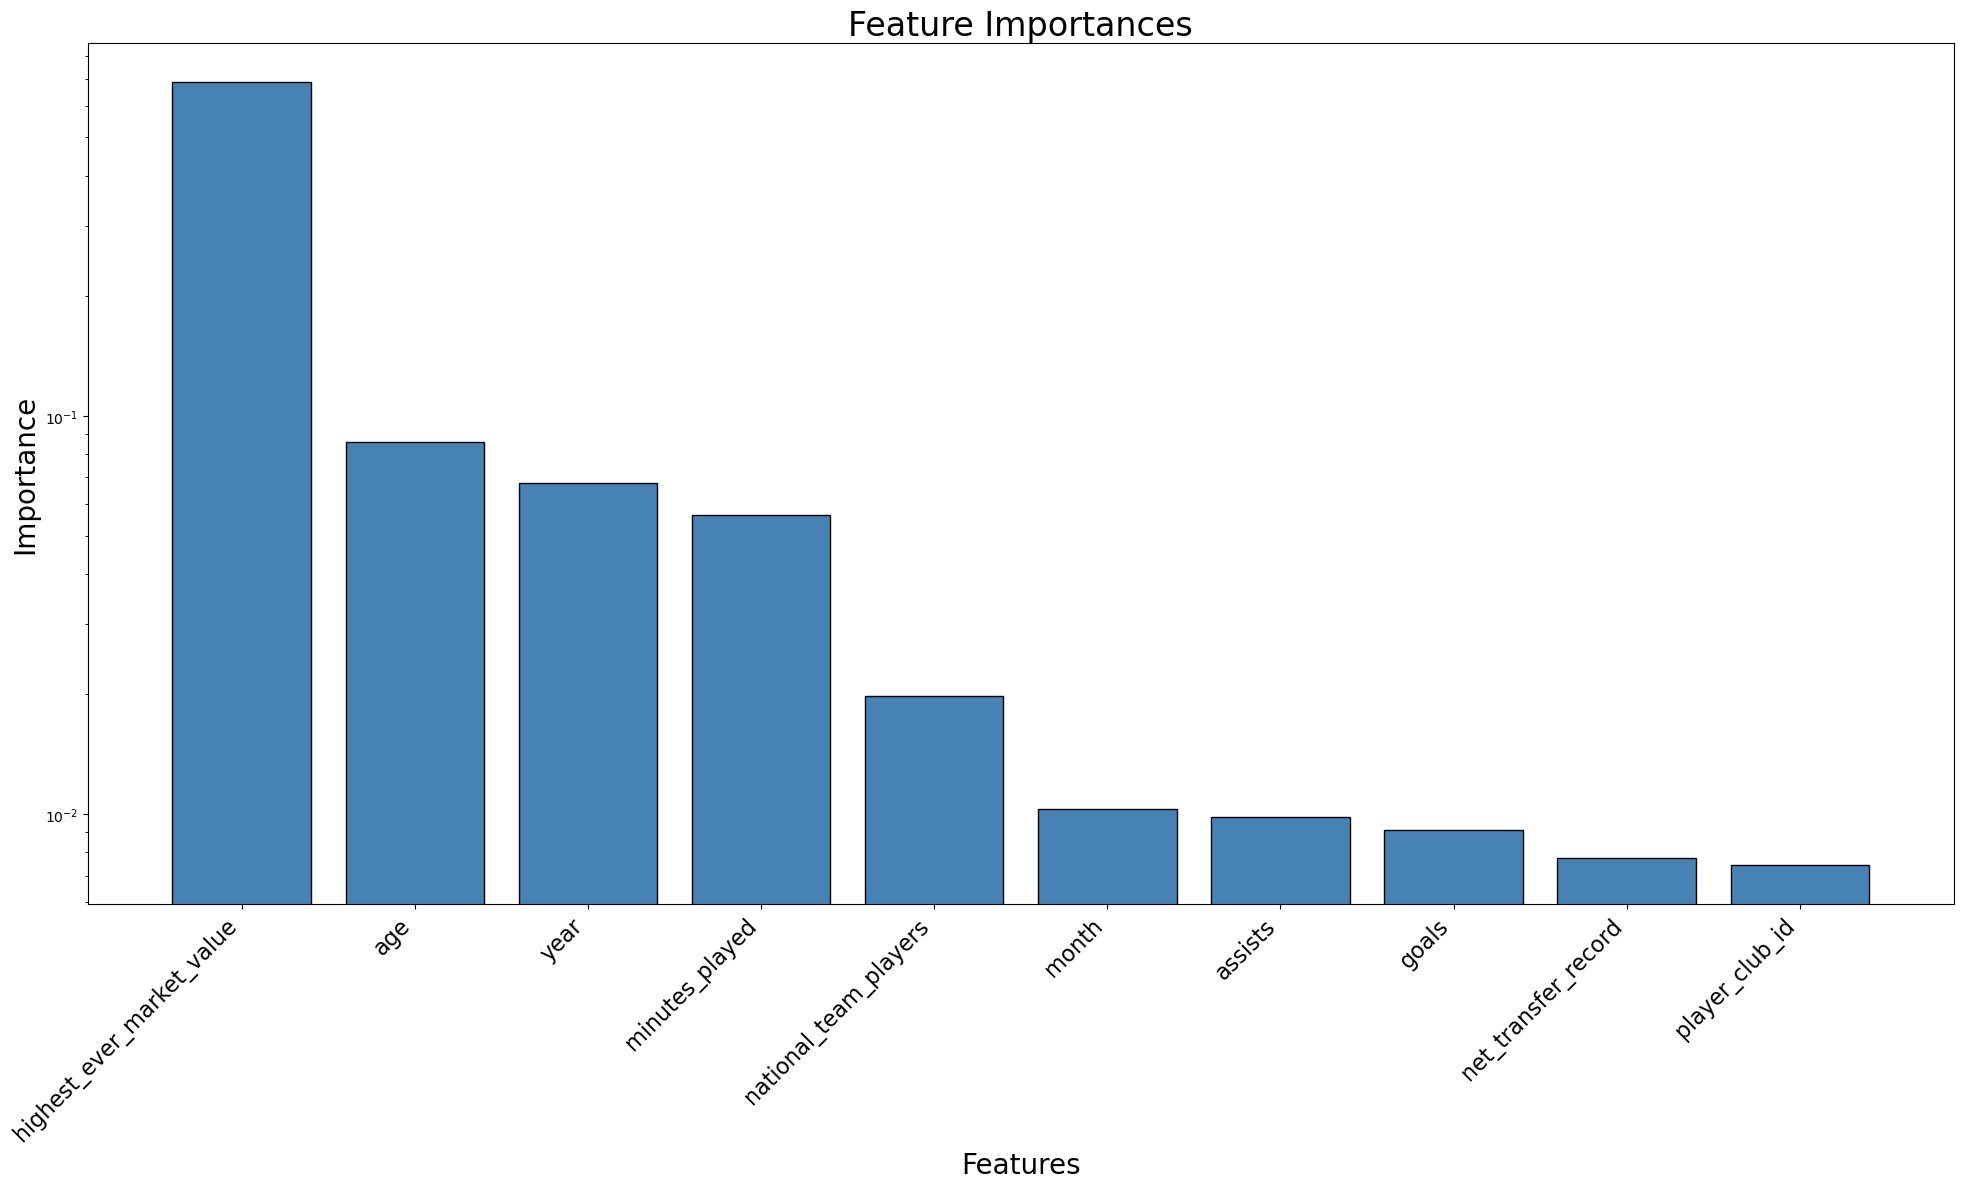

In [33]:
#filter rows where importance  not 0
filtered_importance_df = importance_df[importance_df['Importance'] > 0]

#create stacked bar chart
plt.figure(figsize=(20, 12))
plt.bar(filtered_importance_df['Feature'].head(10), filtered_importance_df['Importance'].head(10), color='steelblue',edgecolor="black")


# log scale my y axis
plt.yscale('log')

#layout graphing
plt.xlabel('Features',fontsize=20)
plt.ylabel('Importance',fontsize=20)
plt.title('Feature Importances',fontsize=24)
plt.xticks(rotation=45, ha='right',fontsize=16)
plt.tight_layout()
plt.show()

`highest_ever_market_value`: highest ever market value is the most important feature when predicting a players market value by a huge margin. 


`age`:
Age ranks highest in importance, suggesting its substantial role in influencing market value predictions.

`year`:
The year is also an important temporal factor, indicating that market values are influenced by trends or changes over time.

`minutes_played`:
Playing time is a significant factor, suggesting its impact on predicting player market values.

`national_team_players`:
How many national team players a team has is also significant as better teams usually have more of them.

`net_transfer_record`:
The transfer record of the club, reflected in the net transfer record, plays a role in determining market values.

`goals`:
Goal-scoring ability is considered, indicating its influence on predicting player market values.

`assists`:
Contributions to goals through assists also contribute to predictions.

`month`:
The month may indicate periodic trends, but it holds relatively less importance compared to other features.

`player_club_id`:
The actual club id holds less information about the valuation than other certain attributes of the club which is a bit strange.

These importance scores guide my understanding of which features are more influential in determining player market values and help in feature selection and further analysis.